In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
cancer=datasets.load_breast_cancer()


In [45]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [47]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [48]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [49]:
X=cancer.data
y=cancer.target

In [50]:
X.shape , y.shape

((569, 30), (569,))

###  Standardize X

In [51]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Split the data and Build the model

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1,stratify=y)

In [53]:
from sklearn import svm

In [54]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_predict))
print('Precision:',metrics.precision_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict))

Accuracy: 0.9912280701754386
Precision: 0.9863013698630136
Recall: 1.0


Text(91.68, 0.5, 'True values')

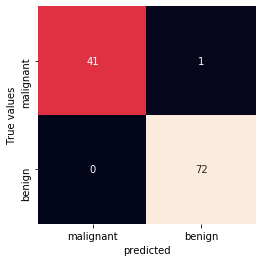

In [55]:
mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=cancer.target_names,yticklabels=cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('True values')

### polynomial kernel

Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9861111111111112


Text(91.68, 0.5, 'True values')

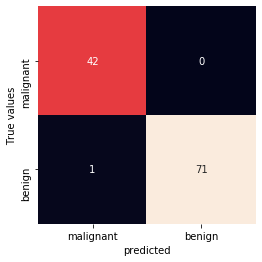

In [58]:
clf=svm.SVC(kernel='poly',degree=1,gamma=100)
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_predict))
print('Precision:',metrics.precision_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict))

mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=cancer.target_names,yticklabels=cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('True values')

### Sigmoid kernel

Accuracy: 0.9035087719298246
Precision: 0.9420289855072463
Recall: 0.9027777777777778


Text(91.68, 0.5, 'True values')

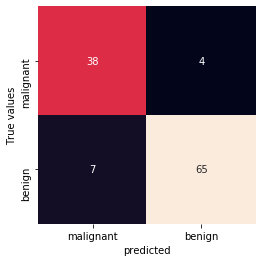

In [61]:
clf=svm.SVC(kernel='sigmoid',gamma=100,C=0.20)
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_predict))
print('Precision:',metrics.precision_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict))

mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=cancer.target_names,yticklabels=cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('True values')